# Credit Card Fraud Detection

To start, let's print out the version numbers of all the libraries we will be using in this project. This serves two purposes - it ensures we have installed the libraries correctly and ensures that this tutorial will be reproducible.

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn as sk
from sklearn.preprocessing import scale

Now it's time to import the data set that I'm going to be working with. I will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in my dataset. For this purpose, I will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.

In [4]:
# Load the dataset from the csv file using pandas
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,62066.0,-3.068888,-0.437757,-0.768928,-0.499062,-0.014250,-1.395235,-0.092321,0.757391,-0.704814,...,-0.212912,-1.136312,-0.600351,0.078742,-1.185967,0.264915,-0.608963,-0.662815,67.00,0
1,153614.0,2.082743,-1.358095,0.263945,-0.680578,-1.607912,0.348774,-1.740674,0.306474,0.816377,...,0.165268,0.753192,0.189069,-0.306734,-0.337376,-0.188374,0.056782,-0.050948,4.50,0
2,69272.0,-0.272139,0.944589,1.288408,0.424976,0.256979,-0.451982,0.536125,0.018004,-0.571136,...,-0.128559,-0.357941,0.092251,0.032293,-0.811472,0.118106,0.150773,0.171883,2.99,0
3,159347.0,0.015823,0.795642,0.823453,0.229431,0.602350,-0.144133,0.689584,0.078280,-0.313499,...,-0.343847,-0.969278,0.157063,-0.435913,-0.629644,-1.236179,0.107826,0.053843,5.00,0
4,35609.0,-0.822254,0.377457,0.969508,-0.132443,0.348400,-0.055755,0.884427,0.103091,-0.642840,...,-0.307452,-1.121524,0.294160,-0.390957,-0.849606,-0.209892,-0.020646,0.178519,109.38,0


V1 - V28 is the location the person logged in at and data on the user that's masked with numbers. The used principle component analysis to hide these peoples data. 

In [7]:
# Start exploring the dataset
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


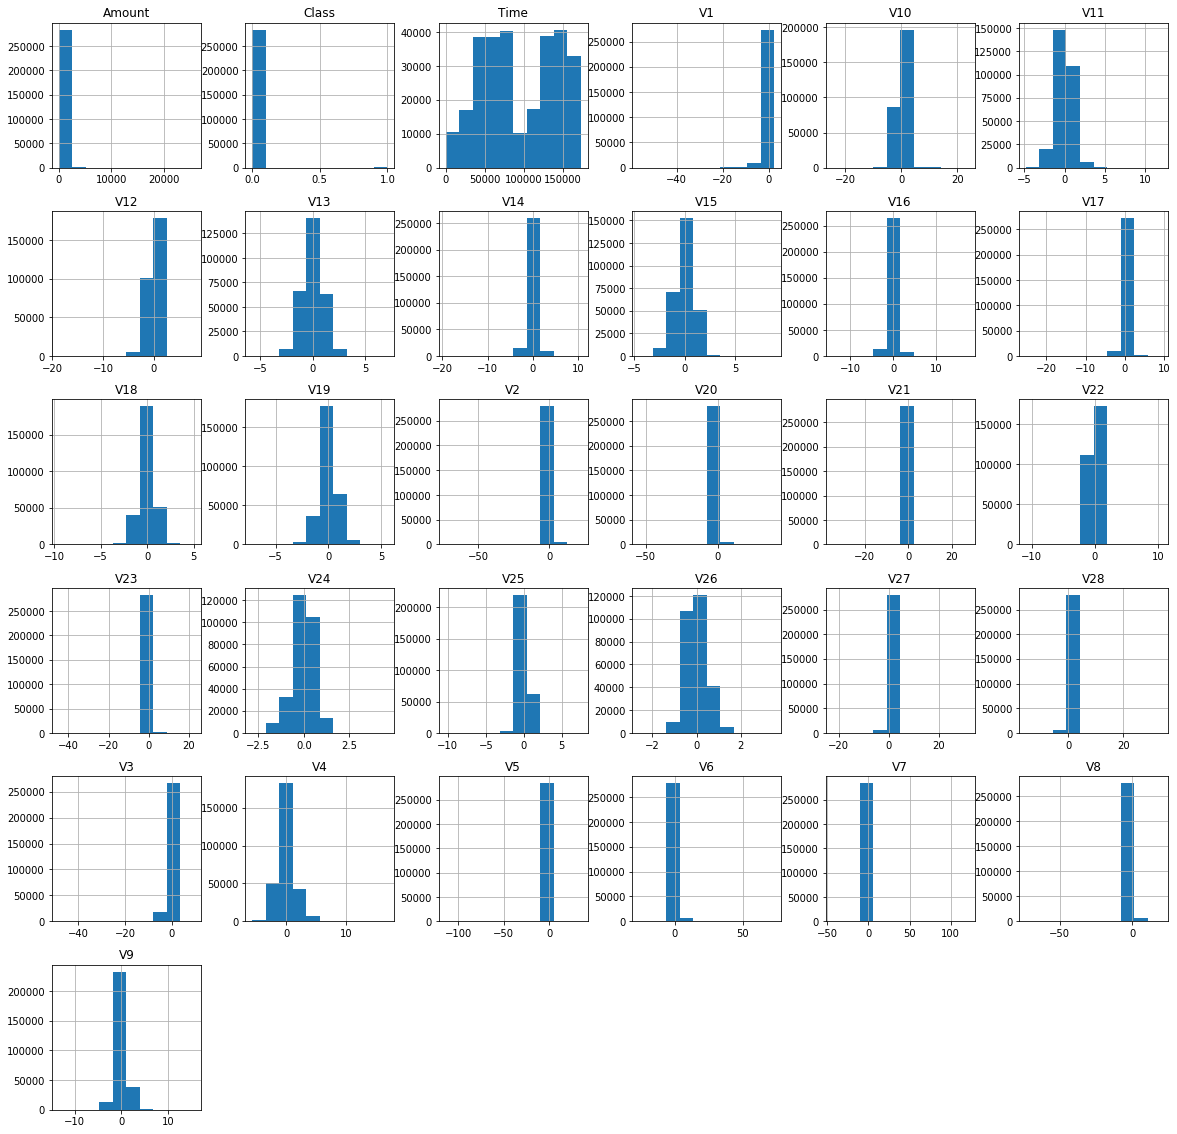

In [8]:
# Plot histograms of each parameter 
df.hist(figsize = (20, 20))
plt.show()

In [17]:
# Determine number of fraud and non fraud cases in dataset

fraud = df.loc[df['Class'] == 1]
valid = df.loc[df['Class'] == 0]



outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


# Exploratory Data Analysis

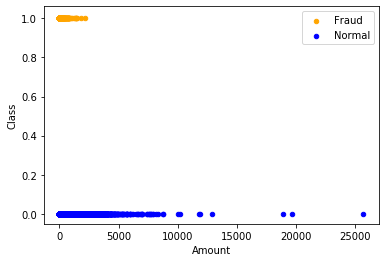

In [18]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
valid.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

The Fraud data looks like it's mainly for smaller transactions between 0 and 5000

# Time for Machine Learning

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [28]:
# Select all the columns except the last one with the iloc feature
x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

## Time to build the Model

In [33]:
# C is a penalty term it's meant for logistic regression to prevent overfittting 
#1e5 is short for 100,000
logistic = linear_model.LogisticRegression(C=1e9)
# C value helps w/ regularization 
logistic.fit(X_train, y_train)
print('Score:', logistic.score(X_test, y_test))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9988062112128367


The model is 99 percent accurate but that might be due to overfitting

In [34]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]


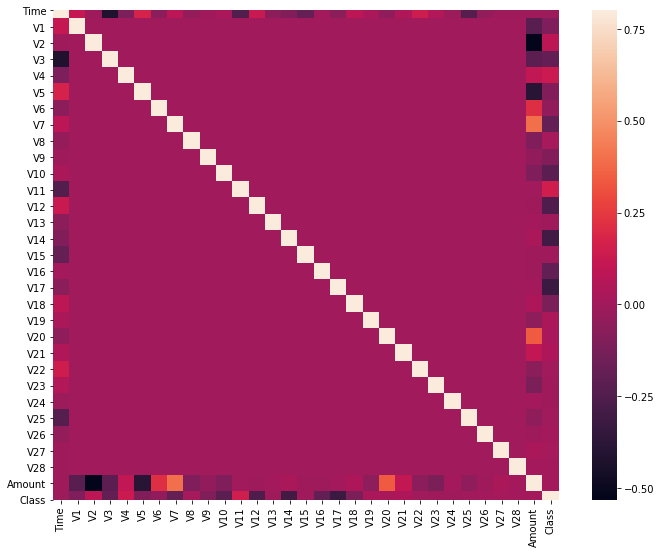

In [31]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [9]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


# Unsupervised Outlier Detection

Local Outlier Factor (LOF):

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood.

Isolation Forest Algorithm:

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [24]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state,
                                        behaviour='new'
                                       ),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [25]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

<Figure size 648x504 with 0 Axes>

In [26]:
clf = classifiers['Isolation Forest']

In [27]:
clf.fit(X)

IsolationForest(behaviour='new', bootstrap=False,
                contamination=0.0017304750013189597, max_features=1.0,
                max_samples=284807, n_estimators=100, n_jobs=None,
                random_state=1, verbose=0, warm_start=False)

In [28]:
predictions = clf.predict(X)

In [29]:
predictions[predictions == 1] = 0
predictions[predictions == -1] = 1

In [35]:
accuracy_score(Y[Y == 1], predictions[Y == 1])

0.34552845528455284

In [39]:
predictions[Y == 1]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:
predictions.shape

(284807,)

In [33]:
print(classification_report(Y, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807



In [ ]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 645
0.997735308472053


In [34]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
